# Weather Matplotlib Advanced

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt

link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2019.csv"
df_weather = pd.read_csv(link).iloc[:,[0, 1, 2, -3]]

df_weather['DATE'] = pd.to_datetime(df_weather['DATE'])

In [ ]:
df_weather.head()

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,OPINION
0,2019-01-01,9,4,very bad
1,2019-01-02,8,5,very bad
2,2019-01-03,6,0,very bad
3,2019-01-04,5,-1,very bad
4,2019-01-05,6,-1,very bad



## 4 charts
You have to show a figure with 4 subplots :
- For the top left one : scatterplot with MAX (in red) and MIN (in blue) Temperatures (Y-axis), and date on X-axis
- For the top right one : [a pie-chart ](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pie.html)with frequencies of opinions. Could you "explode" the "very good" part ?
- For the bottom left one : a zoom on january, with MAX Temperatures on a column chart (bar), and MIN temperature on a curve (plot). Date on X-axis.
- For the bottom right one : [an histogram ](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.hist.html)with MAX Temperatures on X-axis. 

Each chart must have a title, a legend for the colors, and of course, readable axis (ticks)

Here is an example of what is expected :

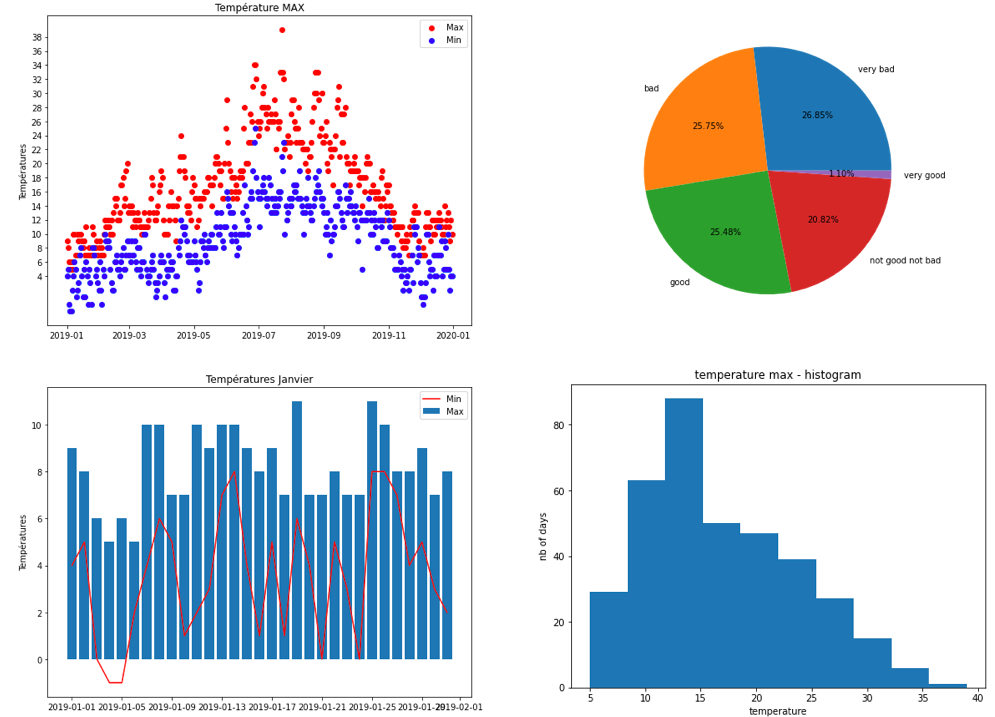

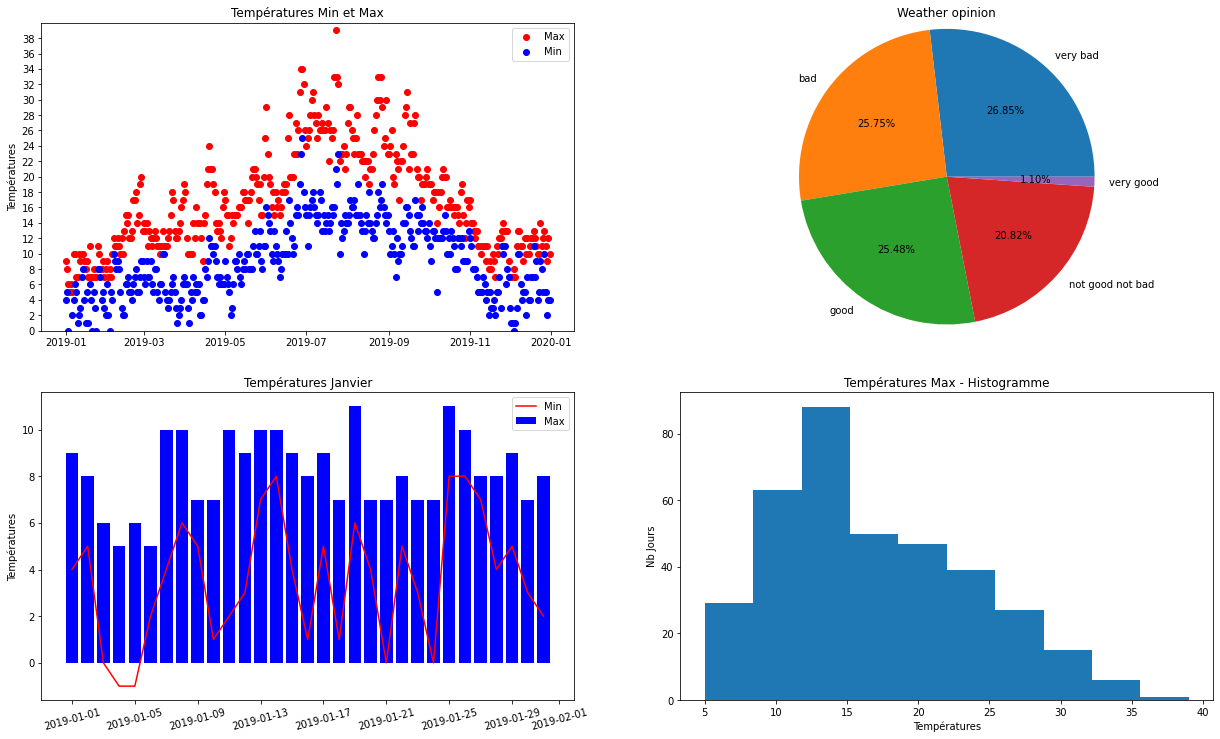

In [ ]:
# Taille de l'affichage
plt.subplots(figsize=(17,10))
plt.tight_layout()

# ------------------ Scatter Plot ------------------#

# Emplacement du graphique
plt.subplot(2,2,1)

# Graphique nuages de points
plt.scatter(x = df_weather["DATE"], y = df_weather["MAX_TEMPERATURE_C"], c= 'red', label="Max")
plt.scatter(df_weather["DATE"], y = df_weather["MIN_TEMPERATURE_C"], c= 'blue', label="Min")

# Légende
plt.legend(["Max", "Min"], loc='upper right')
# Titre graphique
plt.title("Températures Min et Max")
# Titre ordonnée
plt.ylabel("Températures")
# Echelle ordonnée
max_temp = df_weather["MAX_TEMPERATURE_C"].max() +1
plt.ylim([0, max_temp])
plt.yticks(np.arange(0, max_temp, 2))


# ------------------ pie ------------------#

# dataframe opinion / total
opinion_df = df_weather['OPINION'].value_counts().reset_index().rename(columns={"index":"opinion", "OPINION":"total"})

# Emplacement du graphique
plt.subplot(2,2,2)

# Graphique en camenbert
plt.pie(opinion_df.total, labels=opinion_df.opinion, autopct='%.2f%%', radius=1.2)

# Titre
plt.title('Weather opinion')


# ------------------ bar + plot ------------------#

# For the bottom left one : a zoom on january, 
# with MAX Temperatures on a column chart (bar), and MIN temperature on a curve (plot). Date on X-axis.
janvier_temp = df_weather.iloc[0:31]

# Emplacement du graphique
plt.subplot(2,2,3)

# Graphique bar et line
plt.bar(janvier_temp.DATE, janvier_temp.MAX_TEMPERATURE_C, color='blue')
plt.plot(janvier_temp.DATE, janvier_temp.MIN_TEMPERATURE_C, color='red')

# Légende
plt.legend(["Min", "Max"], loc='upper right')
# Echelle
plt.xticks(rotation=15)
plt.ylabel('Températures')
# Titre
plt.title('Températures Janvier')



# ------------------ Histogramme ------------------#

# Emplacement du graphique
plt.subplot(2,2,4)

# np histogram pour la création des bins (intervalles barres) et compte nombre jours
counts, bins = np.histogram(df_weather.MAX_TEMPERATURE_C)

# Graphique histogramme
plt.hist(bins[:-1], bins, weights=counts)

# Légendes
plt.title('Températures Max - Histogramme')
plt.xlabel('Températures')
plt.ylabel('Nb Jours')


# Afficher graphiques
plt.show()

## Boxplots and outliers

Plot 2 [boxplots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html) : 
1. on the MIN temperature
2. on the MAX temperature

Are there outliers?

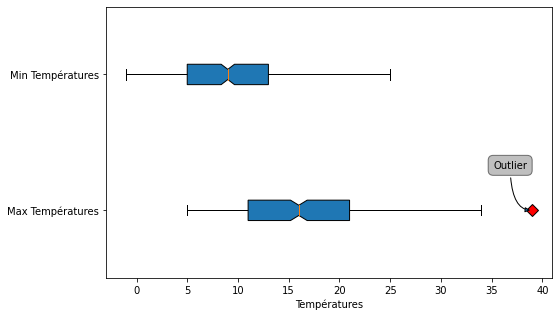

In [ ]:
# Your code here :
data = [df_weather.MAX_TEMPERATURE_C, df_weather.MIN_TEMPERATURE_C]

fig, ax = plt.subplots(figsize=(8,5))

# set up des outlier forme losange et couleur rouge
red_outlier = dict(markerfacecolor='r', marker='D', markersize=8)

# Graphique box plot
graph = ax.boxplot(data, vert=0, notch=True, patch_artist=True, flierprops=red_outlier)

# label pour outlier
top_points = graph["fliers"][0].get_data() # Récupération position outlier
ax.scatter(top_points[0], top_points[1])

ax.annotate("Outlier", 
            xy=(top_points[0], top_points[1]),
            xytext=(-5, 40),
            textcoords='offset points', 
            ha='right', 
            va='bottom',
            bbox=dict(boxstyle='round, pad=0.5', fc='grey', alpha=0.5),
            arrowprops=dict(arrowstyle = '-|>', connectionstyle='angle3'))

# Légende x
ax.set_xlabel('Températures')

# Légende y
ax.set_yticklabels(['Max Températures', 'Min Températures'])

# Afficher graph
fig.show()

# Une valeur aberrante dans les températures MAX

## Last but not least

We would know if Opinion is a good indicator.
Could you draw 1 scatterplot with :
- DATE on X-axis
- MAX Temperature on Y-axis
- Colorize in green the good and very good points
- Colorize in red the bad and very bad points
- Colorize in yellow the not good not bad points

Tips : 
- index attribute of a Series can help you to sort the date correctly
- you may need to stack several graphs based on DataFrame slices

The chart must have a title, a legend for the colors, and of course, readable axis (ticks)

Here is an example of what is expected :

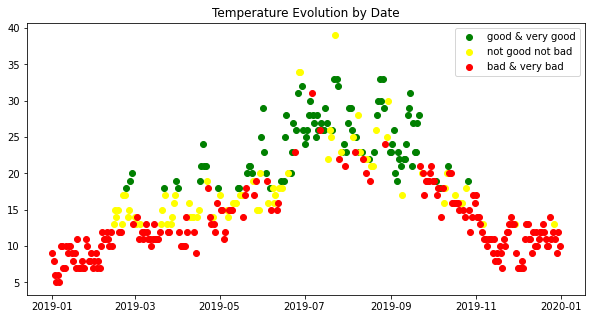

In [ ]:
# Dataframes pour scatter plots
green_dots = df_weather.query('OPINION == "good" or OPINION == "very good"')
red_dots = df_weather.query('OPINION == "bad" or OPINION == "very bad"')
yellow_dots = df_weather.query('OPINION == "not good not bad"')

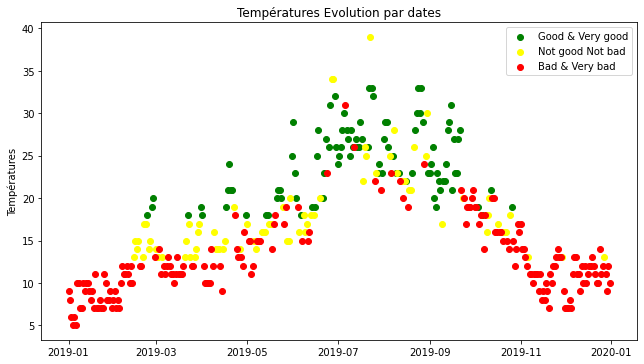

In [ ]:
# It's your turn now :
# Taille de l'affichage
plt.subplots(figsize=(9,5))
plt.tight_layout()

# ------------------ Scatter Plot ------------------#

# Graphique nuage de points
plt.scatter(x = green_dots.DATE, y = green_dots.MAX_TEMPERATURE_C, c= 'green', label="Good & Very good")
plt.scatter(x = yellow_dots.DATE, y = yellow_dots.MAX_TEMPERATURE_C, c= 'yellow', label="Not good Not bad")
plt.scatter(x = red_dots.DATE, y = red_dots.MAX_TEMPERATURE_C, c= 'red', label="Bad & Very bad")

# Légende
plt.legend(["Good & Very good", "Not good Not bad", "Bad & Very bad"], loc='upper right')
# Titre graphique
plt.title("Températures Evolution par dates")
# Titre ordonnée
plt.ylabel("Températures")
# Echelle ordonnée
max_temp = df_weather["MAX_TEMPERATURE_C"].max() +1

# Afficher graph
plt.show()
